## MIDTERM - TEXTBASEDANALYSIS

## AUTHENTICATION

In [23]:
#importing praw package
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

## IMPORTING LIBRARIES

In [24]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## TESLA DATA FROM REDDITM

In [25]:
# Tesla from reddit

headlines = set()
for submission in reddit.subreddit("tesla").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

r/TeslaMotors is the subreddit you're looking for
15qiyhk
dalkon
1691983573.0
22
0.89
https://www.reddit.com/r/teslamotors
0


## TOP POSTS ON TESLA

In [26]:
#top posts from the "TESLA" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("tesla").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

28


## CREATING DATAFRAME

In [27]:
#Create a dataframe from the scrapped data 
tesla_df = pd.DataFrame(headlines)
tesla_df.head()

,0
0,r/TeslaMotors is the subreddit you're looking for
1,The US Military’s Naval Research Laboratory Tr...
2,Tesla's FBI File and US Patents
3,Integza’s Building Nikola Tesla's Bladeless Tu...
4,Waterfall fountain 1913 Nikola Tesla US1113716...


In [28]:
tesla_df.columns = ['Titles']

## DESCRIPTIVE STATISTICS

In [29]:
#creating new column length that has length of name
tesla_df['length'] = tesla_df['Titles'].str.len()  
tesla_df.describe()

,length
count,28.000000
mean,92.357143
std,58.994171
min,27.000000
25%,51.500000
50%,70.000000
75%,121.500000
max,254.000000


## COLUMNS 

In [30]:
#Columns of tesla dataframe
tesla_df.columns

Index(['Titles', 'length'], dtype='object')

## FIRST10 ROWS

In [31]:
#First 10 rows using head()
tesla_df.head(10)

,Titles,length
0,r/TeslaMotors is the subreddit you're looking for,49
1,The US Military’s Naval Research Laboratory Tr...,113
2,Tesla's FBI File and US Patents,31
3,Integza’s Building Nikola Tesla's Bladeless Tu...,71
4,Waterfall fountain 1913 Nikola Tesla US1113716...,165
5,Tesla protege Al Hubbard (1901-1982),36
6,Experimental realization of Zenneck surface wa...,92
7,John T Williams electro-port: linear motor mai...,67
8,Solar power utility in Ralph 124C 41+ (1911),44
9,Books Tesla Read? Educated?,27


## Q3 REGULAR EXPRESSIONS

In [32]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
tesla_df["Titles"]= tesla_df["Titles"].apply(cleanTxt)

#Show the clean text
tesla_df.head()

,Titles,length
0,r/TeslaMotors is the subreddit you're looking for,49
1,The US Military’s Naval Research Laboratory Tr...,113
2,Tesla's FBI File and US Patents,31
3,Integza’s Building Nikola Tesla's Bladeless Tu...,71
4,Waterfall fountain 1913 Nikola Tesla US1113716...,165


## REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS

In [33]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
tesla_df["Titles"]= tesla_df["Titles"].apply(remove_emoji)

#Show the clean text
tesla_df.head()

,Titles,length
0,r/TeslaMotors is the subreddit you're looking for,49
1,The US Military’s Naval Research Laboratory Tr...,113
2,Tesla's FBI File and US Patents,31
3,Integza’s Building Nikola Tesla's Bladeless Tu...,71
4,Waterfall fountain 1913 Nikola Tesla US1113716...,165


## Q3 STOPWORDS


In [34]:
#importing nltk package
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/likithareddykotla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## REMOVING STOPWORDS

In [35]:
# Function to remove stopwords 

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

stop_words = set(stopwords.words('english'))

tesla_df['Titles'] = tesla_df['Titles'].apply(remove_stopwords)

print(tesla_df)

#def remove_stop(tokens):
 #   stop_words_set = set(stopwords.words('english'))
  #  return [t for t in tokens if t.lower() not in stop_words_set]

                                               Titles  length
0                     r/TeslaMotors subreddit looking      49
1   US Military’s Naval Research Laboratory Transm...     113
2                         Tesla's FBI File US Patents      31
3   Integza’s Building Nikola Tesla's Bladeless Tu...      71
4   Waterfall fountain 1913 Nikola Tesla US1113716...     165
5                Tesla protege Al Hubbard (1901-1982)      36
6   Experimental realization Zenneck surface wave ...      92
7   John Williams electro-port linear motor mail t...      67
8           Solar power utility Ralph 124C 41+ (1911)      44
9                         Books Tesla Read? Educated?      27
10  High frequency atmospheric electrostatic energ...     147
11              Dr. John G. Trump Nikola Tesla (1982)      40
12     Portrait Nikola Tesla made electrical machines      55
13     Cool article found wall. Newspaper insulation.      58
14  FINALLY, Mathologer demystifies 369 disinforma...     174
15  Bruc

## PIPELINE

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [69]:
#downloading nltk anf puntk

nltk.download('punkt')
nltk.download('stopwords')

def tokenize(text):
    return word_tokenize(text)

def remove_stop(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.lower() not in stop_words]

# Rest of your code
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/likithareddykotla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/likithareddykotla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## GENERATING TOKENS

In [70]:
#running the pipeline
tesla_df['Tokens'] = tesla_df['Titles'].apply(prepare, pipeline=pipeline)


## COUNTING TOKENS

In [72]:
#counting the tokens
tesla_df['Num_tokens'] = tesla_df['Tokens'].map(len)
tesla_df.tail()

,Titles,length,Subjectivity,Polarity,Insight,Tokens,Num_tokens
23,Corona discharge capacitors 1943 Thomas Henry ...,61,0.000000,0.000000,Neutral,"[corona, discharge, capacitors, 1943, thomas, ...",8
24,Bruce Perreault alpha fusion valve 2007 US7800...,71,0.000000,0.000000,Neutral,"[bruce, perreault, alpha, fusion, valve, 2007,...",10
25,Sad day. Tesla's Lab Long Island Burned ground.,57,0.700000,-0.275000,Negative,"[sad, day, ., tesla, 's, lab, long, island, bu...",11
26,Tubular linear motor mail transport 1886 Port ...,70,0.000000,0.000000,Neutral,"[tubular, linear, motor, mail, transport, 1886...",10
27,Simple high power earth battery 1892 Michael E...,153,0.432381,0.053333,Positive,"[simple, high, power, earth, battery, 1892, mi...",32


# WORD FREQUENCY ANALYSIS

Word frequency analysis is a technique used in natural language processing (NLP) and text mining to examine the frequency of words in a given text or dataset.

In [73]:
#importing Counter
from collections import Counter

## DISPLAYING KEY VALUES

In [75]:
#iterates over each entry,updating the counter with the token counts
counter = Counter()
tesla_df['Tokens'].map(counter.update)  
print(counter.most_common(5))

[('tesla', 16), ('.', 10), ('-', 9), ('(', 7), (')', 7)]


In [76]:
#include only rows where the 'freq' column is greater than or equal to 1.
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1') 
freq_df.index.name = 'token'

## DISPLAYING FREQUENCY

In [77]:
#Sorts and displays
freq_df = freq_df.sort_values('freq', ascending=False) 
freq_df.head(10)  

,freq
token,
tesla,16
.,10
-,9
(,7
",",7
),7
power,7
nikola,6
energy,5


## Q3 WORDCLOUD

In [78]:
#importing wordcloud 
from wordcloud import WordCloud
from matplotlib import pyplot as plt

## GENERATING WORDCLOUD

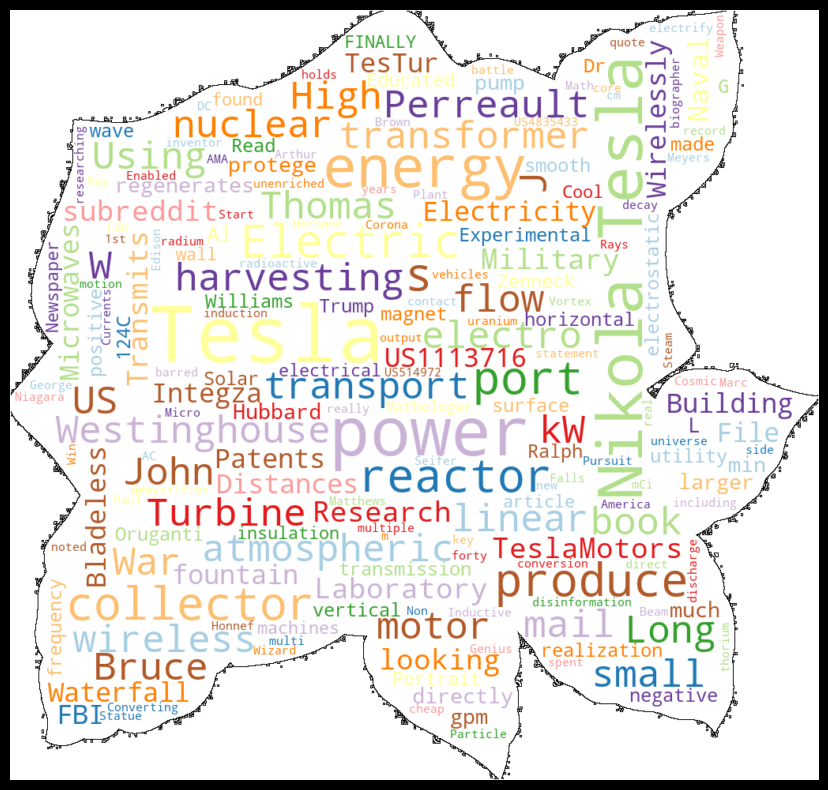

In [79]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in tesla_df['Titles']] ) 

image = Image.open('shape.jpeg')
mask = np.array(image)

max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 1000,
                      mask = mask,
                      contour_width = 0.01,
                      colormap = 'Paired',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

## WORDCLOUD 2

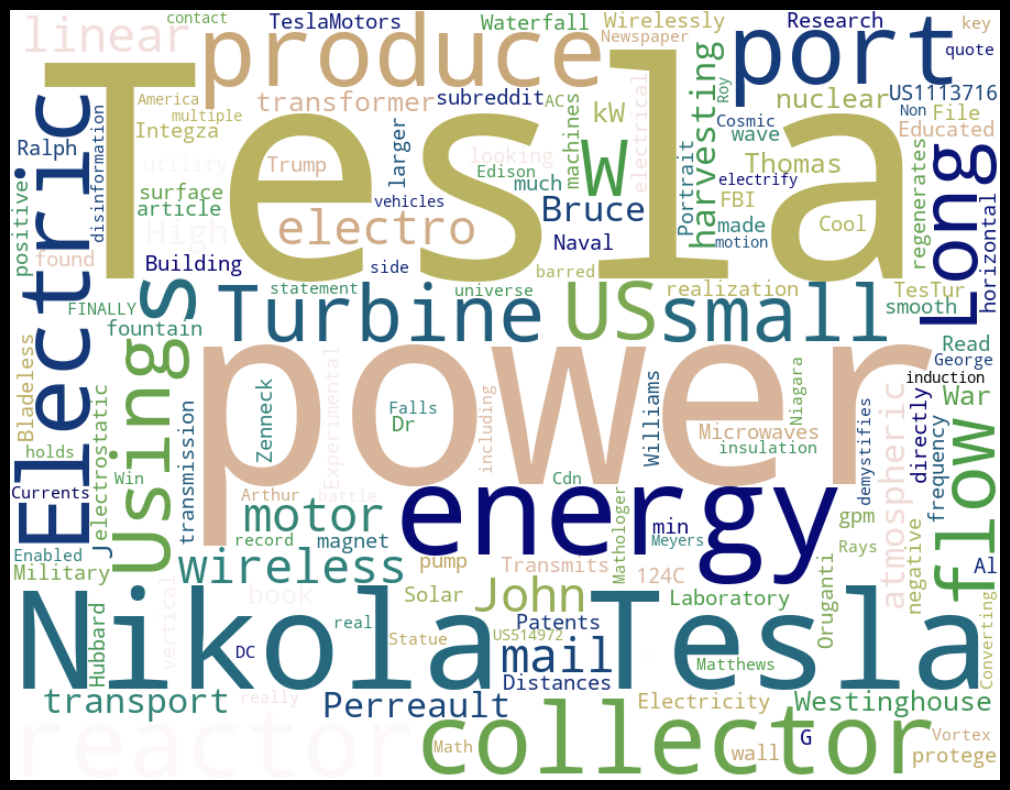

In [80]:
#importing wordcloud and stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Titles' column exists in amazon_df
text = ' '.join([str(twts) for twts in tesla_df['Titles']])

# Generate word cloud with the default rectangular shape
wordcloud = WordCloud(width=900, height=700,
                      max_words=150,
                      stopwords=STOPWORDS,
                      contour_width=0.1,
                      colormap='gist_earth',
                      background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Q2 PLOTTING

## BOXPLOT

Text(0.5, 1.0, 'BOXPLOT')

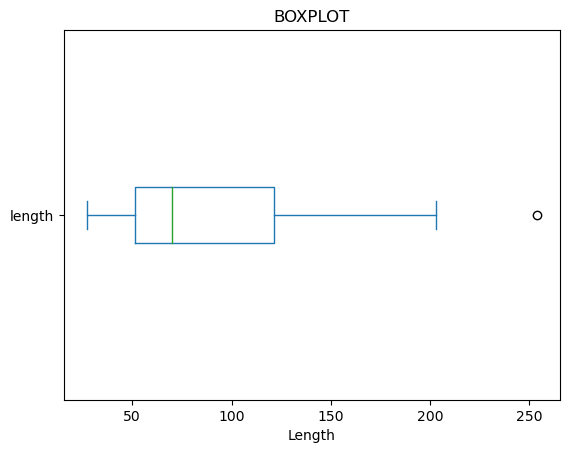

In [81]:
# Boxplot for length column
tesla_df['length'].plot(kind='box', vert=False)
plt.xlabel('Length')
plt.title('BOXPLOT')

## HISTOGRAM

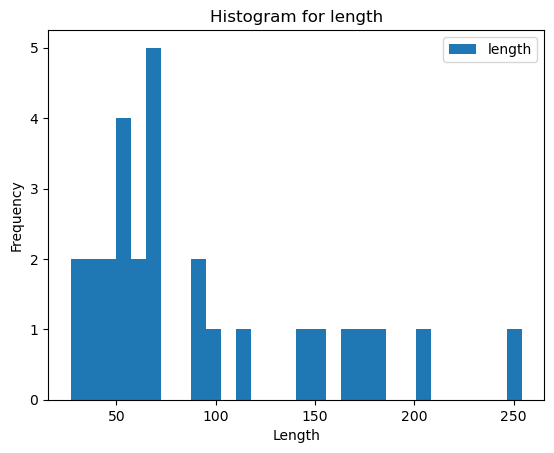

In [82]:
# Histogram for 30 samples for length coulmn

tesla_df['length'].plot(kind='hist', bins=30)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Histogram for length')
plt.legend()
plt.show()

## AREA PLOT

<Axes: >

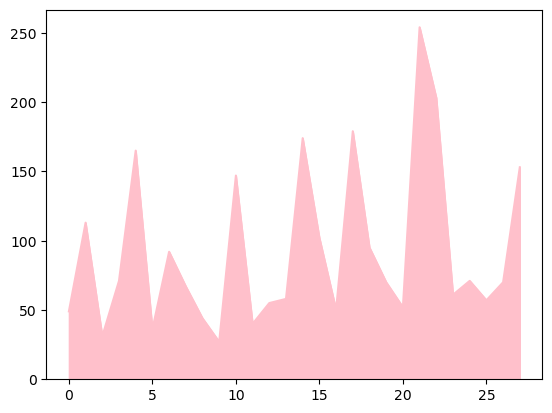

In [83]:
#Area plot for length column
tesla_df['length'].plot(kind='area',color = 'pink')

## Q2 STATISTICS

## DESCRIBE METHOD

In [84]:
#describe method
print("Basic Statistics:")
print(tesla_df['length'].describe())


Basic Statistics:
count     28.000000
mean      92.357143
std       58.994171
min       27.000000
25%       51.500000
50%       70.000000
75%      121.500000
max      254.000000
Name: length, dtype: float64


## MEAN OF LENGTH COLUMN

In [85]:
# Calculating the mean
mean_length = tesla_df['length'].mean()
print(f"\nMean Length: {mean_length}")




Mean Length: 92.35714285714286


## MEDIAN OF LENGTH


In [86]:
# Calculating the median
median_length = tesla_df['length'].median()
print(f"Median Length: {median_length}")



Median Length: 70.0


## STANDARD DEVIATION

In [87]:
# Calculate the standard deviation
std_dev_length = tesla_df['length'].std()
print(f"Standard Deviation: {std_dev_length}")

Standard Deviation: 58.99417063839587


# Q5 SENTIMENT ANALYSIS

In [103]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## POLARITY AND SUBJECTIVITY

In [104]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
tesla_df['Subjectivity'] = tesla_df['Titles'].apply(getSubjectivity)
tesla_df['Polarity'] = tesla_df['Titles'].apply(getPolarity)

#Now display data
tesla_df.head()

,Titles,length,Subjectivity,Polarity,Insight,Tokens,Num_tokens,Bing_Liu_Score
0,r/TeslaMotors subreddit looking,49,0.000000,0.000,Neutral,"[r/teslamotors, subreddit, looking]",3,2
1,US Military’s Naval Research Laboratory Transm...,113,0.250000,-0.075,Negative,"[us, military, ’, naval, research, laboratory,...",13,2
2,Tesla's FBI File US Patents,31,0.000000,0.000,Neutral,"[tesla, 's, fbi, file, us, patents]",6,2
3,Integza’s Building Nikola Tesla's Bladeless Tu...,71,0.000000,0.000,Neutral,"[integza, ’, building, nikola, tesla, 's, blad...",11,2
4,Waterfall fountain 1913 Nikola Tesla US1113716...,165,0.433333,-0.050,Negative,"[waterfall, fountain, 1913, nikola, tesla, us1...",28,2


## CATEGORIZING DATA

In [105]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
tesla_df["Insight"] = tesla_df["Polarity"].apply(getInsight)

tesla_df.head(20)

,Titles,length,Subjectivity,Polarity,Insight,Tokens,Num_tokens,Bing_Liu_Score
0,r/TeslaMotors subreddit looking,49,0.000000,0.000000,Neutral,"[r/teslamotors, subreddit, looking]",3,2
1,US Military’s Naval Research Laboratory Transm...,113,0.250000,-0.075000,Negative,"[us, military, ’, naval, research, laboratory,...",13,2
2,Tesla's FBI File US Patents,31,0.000000,0.000000,Neutral,"[tesla, 's, fbi, file, us, patents]",6,2
3,Integza’s Building Nikola Tesla's Bladeless Tu...,71,0.000000,0.000000,Neutral,"[integza, ’, building, nikola, tesla, 's, blad...",11,2
4,Waterfall fountain 1913 Nikola Tesla US1113716...,165,0.433333,-0.050000,Negative,"[waterfall, fountain, 1913, nikola, tesla, us1...",28,2
5,Tesla protege Al Hubbard (1901-1982),36,0.000000,0.000000,Neutral,"[tesla, protege, al, hubbard, (, 1901-1982, )]",7,2
6,Experimental realization Zenneck surface wave ...,92,0.400000,0.100000,Positive,"[experimental, realization, zenneck, surface, ...",11,2
7,John Williams electro-port linear motor mail t...,67,0.000000,0.000000,Neutral,"[john, williams, electro-port, linear, motor, ...",8,2
8,Solar power utility Ralph 124C 41+ (1911),44,0.000000,0.000000,Neutral,"[solar, power, utility, ralph, 124c, 41+, (, 1...",9,2
9,Books Tesla Read? Educated?,27,0.000000,0.000000,Neutral,"[books, tesla, read, ?, educated, ?]",6,2


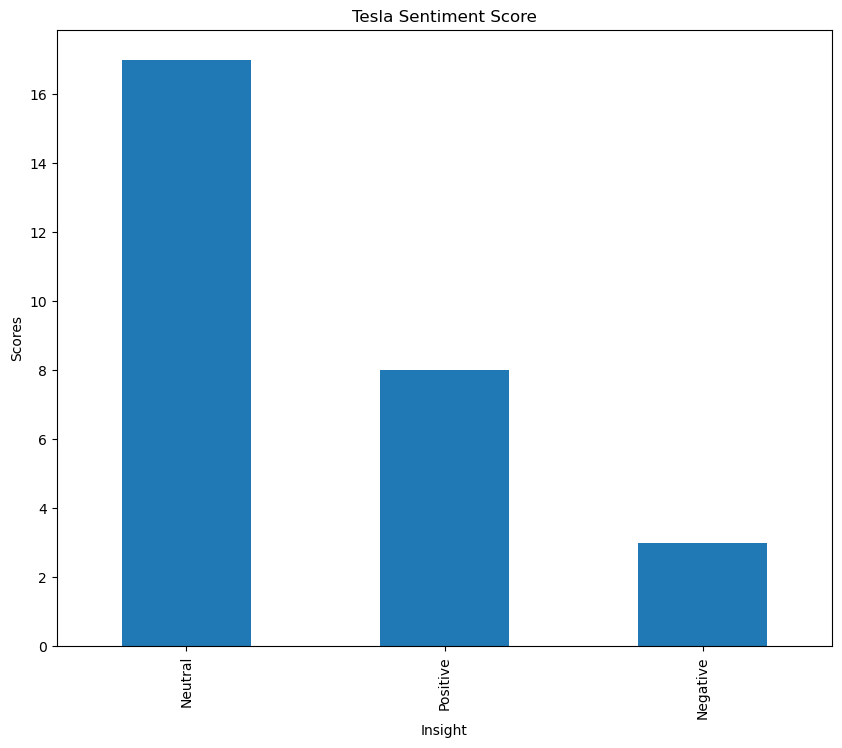

In [107]:
#Plot the values count of sentiment
plt.title("Tesla Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
tesla_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Q6 BING_ LIU_SCORING ALGORITHM

In [96]:
#opinion_lexicon provides access to positive and negative words
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize #word_tokenize is used for tokenization.


In [97]:
# prints total number of words in the opinion lexicon
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])     #display examples of positive and negative words from the opinion lexicon
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


## ADDING SCORES

In [93]:
#set the positive and negative scores to be assigned to words in the word_dict dictionary.
pos_score = 1
neg_score = -1

In [98]:
#Adding the positive words to the dictionary
word_dict = {}
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score       #iterates through the positive words in the Opinion Lexicon and assigns each word a positive score in the dictionary
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score       #iterates throug -ve words and assigns each a -ve score in dictionary


In [91]:
#defining bing_liu algorithm
def bing_liu_score(Titles):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())  #word_tokenize splits the text into individual words.
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  

In [ ]:
tesla_df['Bing_Liu_Score'] = tesla_df['Titles'].apply(bing_liu_score)

## PREVIEWING DATA

In [100]:
#Previewing the sentiment analysis results for the top 10 rows

tesla_df[['Titles', 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,r/TeslaMotors subreddit looking,2
1,US Military’s Naval Research Laboratory Transm...,2
2,Tesla's FBI File US Patents,2
3,Integza’s Building Nikola Tesla's Bladeless Tu...,2
4,Waterfall fountain 1913 Nikola Tesla US1113716...,2
5,Tesla protege Al Hubbard (1901-1982),2
6,Experimental realization Zenneck surface wave ...,2
7,John Williams electro-port linear motor mail t...,2
8,Solar power utility Ralph 124C 41+ (1911),2
9,Books Tesla Read? Educated?,2


In [102]:
#Calculating the mean Bing Liu sentiment score
tesla_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
AC DC? Nikola Tesla Enabled George Westinghouse Win War Electric Currents Thomas Edison. Westinghouse no-holds-barred battle electrify America.,2.0
Atmospheric energy harvesting Roy J Meyers 1913 & Hermann Honnef 1925,2.0
Books Tesla Read? Educated?,2.0
Bruce Perreault - Converting Cosmic Rays Electric Energy - including statement Arthur Matthews,2.0
Bruce Perreault alpha fusion valve 2007 US7800286 atomic power tube,2.0
Cool article found wall. Newspaper insulation.,2.0
Corona discharge capacitors 1943 Thomas Henry Moray US2460707,2.0
Dr. John G. Trump Nikola Tesla (1982),2.0
Experimental realization Zenneck surface wave wireless power transmission - Oruganti 2020,2.0
